# Scientific Computing on a Laptop

[**Jean-Christophe Loiseau**](https://github.com/loiseaujc)</br>
DynFluid Laboratory</br>
Arts & Métiers Institute of Technology

---

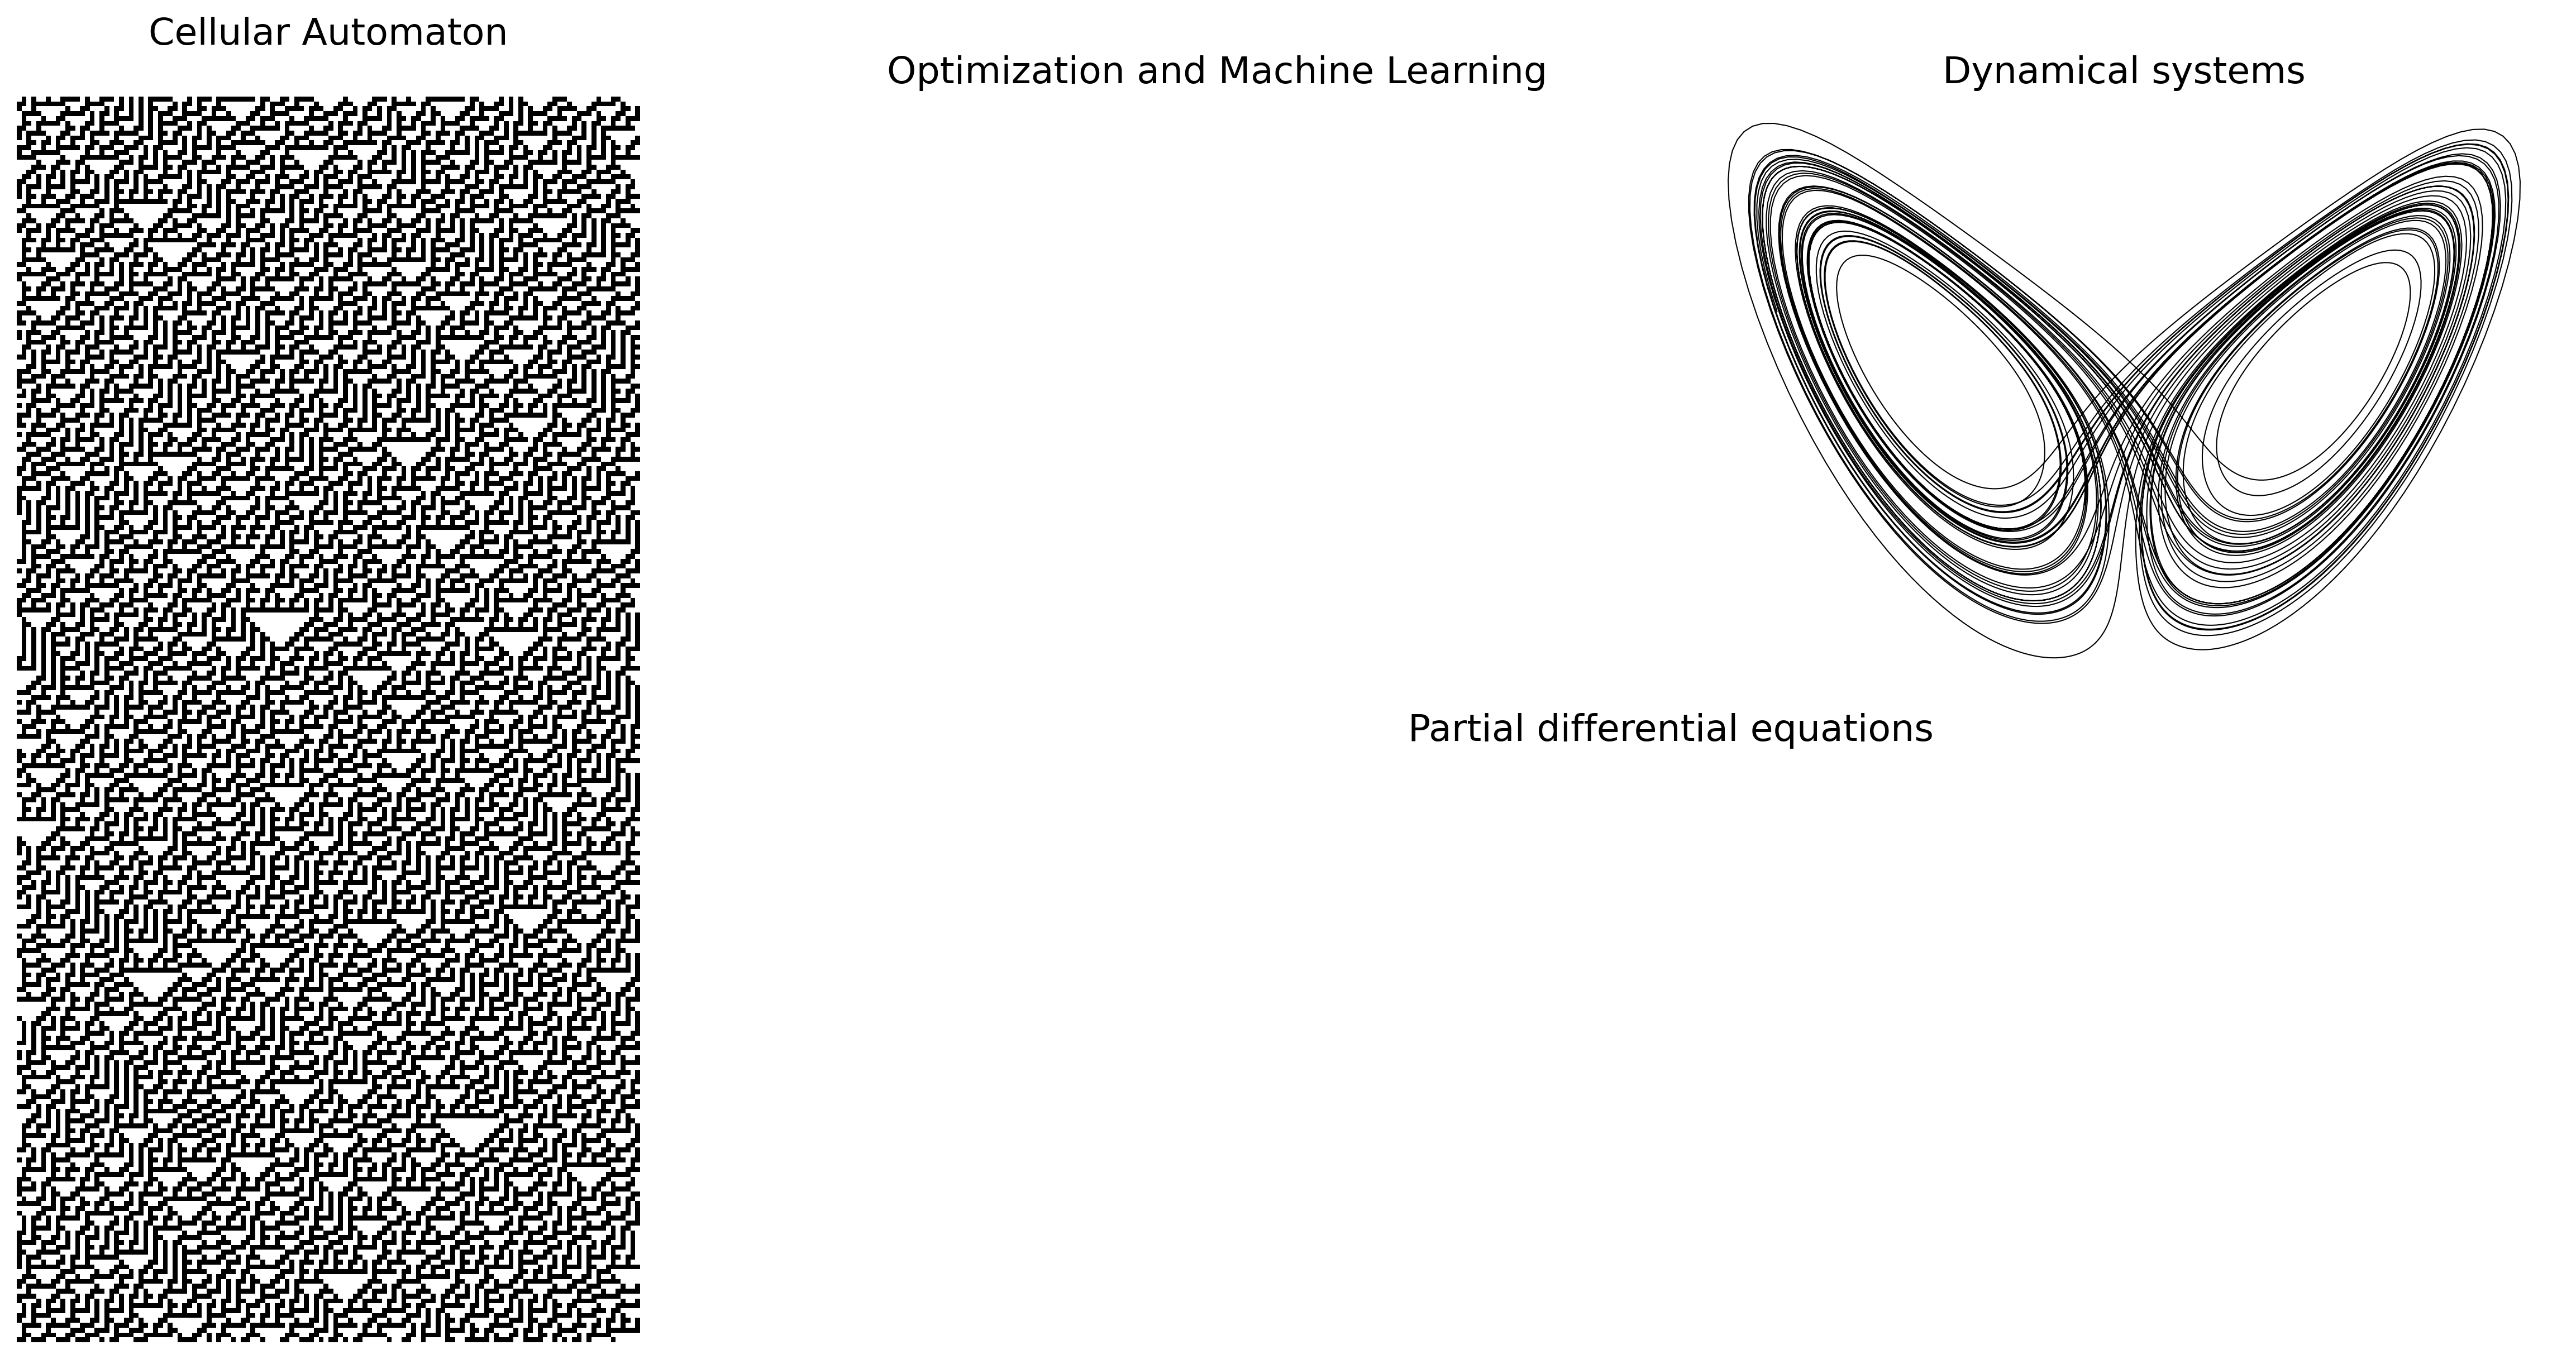

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# --> Plot the figure.
fig = plt.figure(figsize=(16, 8), constrained_layout=True, dpi=300)
gs = fig.add_gridspec(2, 3)

######################################
#####                            #####
#####     CELLULAR AUTOMATON     #####
#####                            #####
######################################

# -->
def rule_index(triplet):
    L, C, R = triplet
    index = 7 - (4*L + 2*C + R)
    return int(index)

# --> Update rule for the cellular automaton.
def run(initial_state, nsteps, rule_number=30):
    rule_string = np.binary_repr(rule_number, 8)
    rule = np.array([int(bit) for bit in rule_string])
    ncells = len(initial_state)
    
    state = np.zeros((nsteps, ncells))
    state[0] = initial_state
    
    for step in range(1, nsteps):
        all_triplets = np.stack([np.roll(state[step-1], 1), state[step-1], np.roll(state[step-1], -1)])
        state[step] = rule[np.apply_along_axis(rule_index, 0, all_triplets)]
        
    return state
    
# --> Run the simulation.
ncells, nsteps = 128, 256

initial_state = np.random.randint(0, 2, ncells)
state = run(initial_state, nsteps)

# --> Cellular Automaton figure.
ax = fig.add_subplot(gs[:, 0])

ax.matshow(state, cmap=plt.cm.binary)
ax.axis(False)
ax.set_title("Cellular Automaton", fontsize=16);


#####################################
#####                           #####
#####     DYNAMICAL SYSTEMS     #####
#####                           #####
#####################################

from scipy.integrate import solve_ivp

def lorenz(t, u, p):
    # --> Unpack parameters.
    s, r, b = p
    
    # --> Unpack variables.
    x, y, z = u
    
    # --> Lorenz system.
    dx = s * (y-x)
    dy = x * (r-z) - y
    dz = x*y - b*z
    
    return dx, dy, dz

tspan = (0, 50)
p = [10.0, 28.0, 8/3]
u0 = np.random.randn(3)
output = solve_ivp(
    lambda t, u : lorenz(t, u, p),
    tspan,
    u0
    )
    
u0 = output["y"][:, -1]
t = np.linspace(*tspan, 2*4096)
output = solve_ivp(
    lambda t, u : lorenz(t, u, p),
    tspan,
    u0,
    t_eval=t
    )
    

# --> Dynamical Systems.
ax = fig.add_subplot(gs[0, 2])
ax.set_title("Dynamical systems", fontsize=16)

ax.plot(
    output["y"][0], output["y"][-1],
    color="black",
    lw=0.5,
)

ax.axis(False)

################################
#####                      #####
#####     COVER FIGURE     #####
#####                      #####
################################

# --> Optimization example.
ax = fig.add_subplot(gs[0, 1])
ax.set_title("Optimization and Machine Learning", fontsize=16)
ax.axis(False)

# --> Partial differential equations.
ax = fig.add_subplot(gs[1, 1:])
ax.set_title("Partial differential equations", fontsize=16)
ax.axis(False);

---

**Version :** 0.1</br>
**Date :** September 2021